In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [3]:
historical = pd.read_csv('/content/drive/MyDrive/historical_data.csv')
print("Historical Data Preview:")
print(historical.head())
print("\nHistorical Data Info:")
print(historical.info())
print("\nHistorical Data Summary Statistics:")
print(historical.describe())

Historical Data Preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  

In [4]:
fear_greed = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')
print("\nFear-Greed Index Data Preview:")
print(fear_greed.head())
print("\nFear-Greed Data Info:")
print(fear_greed.info())
print("\nFear-Greed Summary Statistics:")
print(fear_greed.describe())


Fear-Greed Index Data Preview:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Fear-Greed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Fear-Greed Summary Statistics:
          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
5

In [5]:
with open('/content/drive/MyDrive/ds_amisha/outputs/dataset_info.txt', 'w') as f:
    f.write("=== Historical Data Info ===\n")
    historical.info(buf=f)
    f.write("\n\n=== Fear-Greed Index Info ===\n")
    fear_greed.info(buf=f)

historical.head(10).to_csv('/content/drive/MyDrive/ds_amisha/csv_files/historical_head.csv', index=False)
fear_greed.head(10).to_csv('/content/drive/MyDrive/ds_amisha/csv_files/fear_greed_head.csv', index=False)

historical.describe().to_csv('/content/drive/MyDrive/ds_amisha/csv_files/historical_describe.csv')
fear_greed.describe().to_csv('/content/drive/MyDrive/ds_amisha/csv_files/fear_greed_describe.csv')

In [24]:
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'], errors='coerce')
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
historical['date'] = historical['Timestamp IST'].dt.date
fear_greed['date'] = fear_greed['date'].dt.date

print("Missing values in Historical Data:")
print(historical.isna().sum())
print("\nMissing values in Fear-Greed Data:")
print(fear_greed.isna().sum())

Missing values in Historical Data:
Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST       131999
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
date                131999
dtype: int64

Missing values in Fear-Greed Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [25]:
print("\nCleaned Historical Data Preview:")
print(historical.head())
print("\nCleaned Fear-Greed Data Preview:")
print(fear_greed.head())


Cleaned Historical Data Preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transactio

In [26]:
merged = pd.merge(historical, fear_greed, on='date', how='left')

merged.to_csv('/content/drive/MyDrive/ds_amisha/csv_files/merged_data.csv', index=False)
print("Merged Data Preview:")
print(merged.head())

Merged Data Preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Or

In [27]:
print("\nMissing Values in Merged Data:")
print(merged[['Account', 'Coin', 'Size USD', 'Closed PnL', 'value', 'classification']].isna().sum())


Missing Values in Merged Data:
Account                0
Coin                   0
Size USD               0
Closed PnL             0
value             175360
classification    175360
dtype: int64


Sentiment Distribution:
classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64

Average Sentiment Value per Classification:
classification
Extreme Fear     16.239037
Extreme Greed    80.363636
Fear             31.645829
Greed            68.667375
Neutral          49.816038
Name: value, dtype: float64


/tmp/ipython-input-562359516.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged, x='classification', order=sentiment_counts.index, palette='coolwarm')


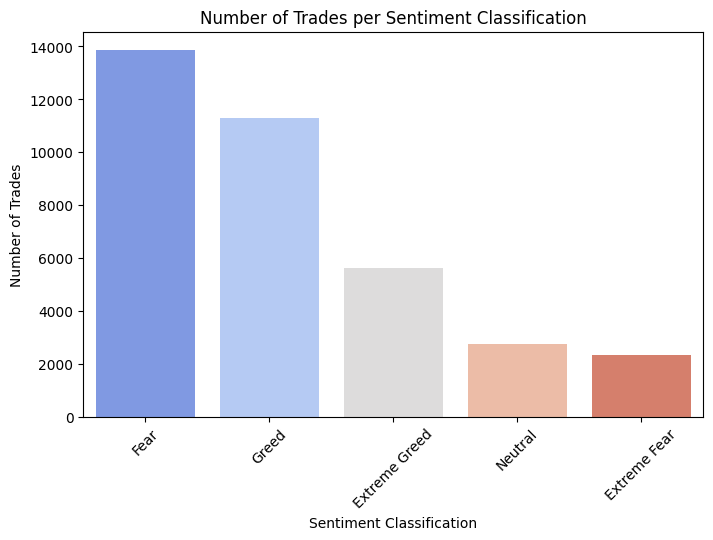

In [28]:
sentiment_counts = merged['classification'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

avg_sentiment_value = merged.groupby('classification')['value'].mean()
print("\nAverage Sentiment Value per Classification:")
print(avg_sentiment_value)

plt.figure(figsize=(8,5))
sns.countplot(data=merged, x='classification', order=sentiment_counts.index, palette='coolwarm')
plt.title('Number of Trades per Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/NumberofTradesperSentimentClassification.png', dpi=300, bbox_inches='tight')

plt.show()



Trading Volume by Sentiment and Side (USD):
Side                    BUY         SELL
classification                          
Extreme Fear     5437921.10   4142318.94
Extreme Greed    7575017.10  10648743.17
Fear            42014308.29  37660082.77
Greed           24972270.59  32073545.15
Neutral          5696430.62   6243120.59


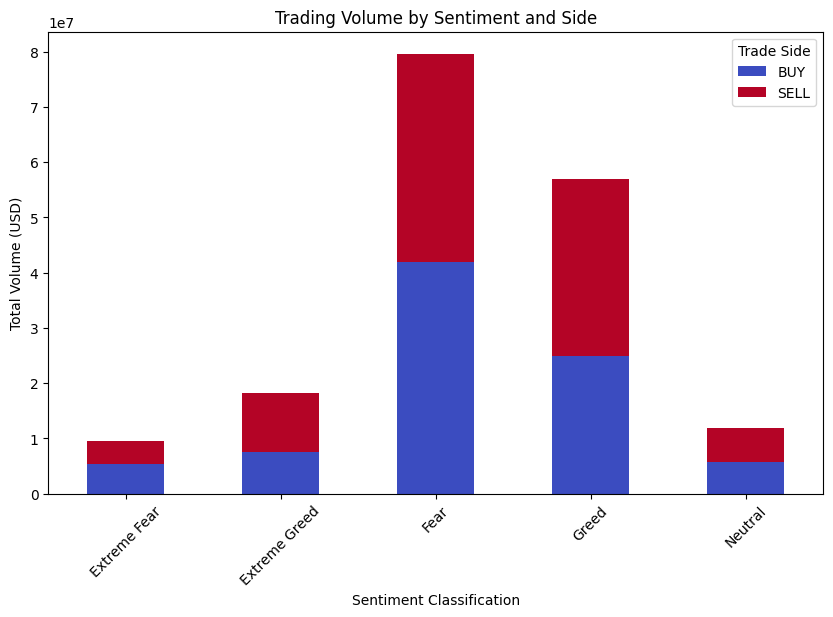

In [29]:
side_sentiment = merged.groupby(['classification','Side'])['Size USD'].sum().unstack().fillna(0)
print("Trading Volume by Sentiment and Side (USD):")
print(side_sentiment)

side_sentiment.plot(kind='bar', figsize=(10,6), stacked=True, colormap='coolwarm')
plt.title('Trading Volume by Sentiment and Side')
plt.ylabel('Total Volume (USD)')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=45)
plt.legend(title='Trade Side')
plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/TradingVolumebySentimentandSide.png', dpi=300, bbox_inches='tight')

plt.show()

Average Closed PnL by Sentiment Classification:
classification
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Extreme Fear       1.891632
Name: Closed PnL, dtype: float64


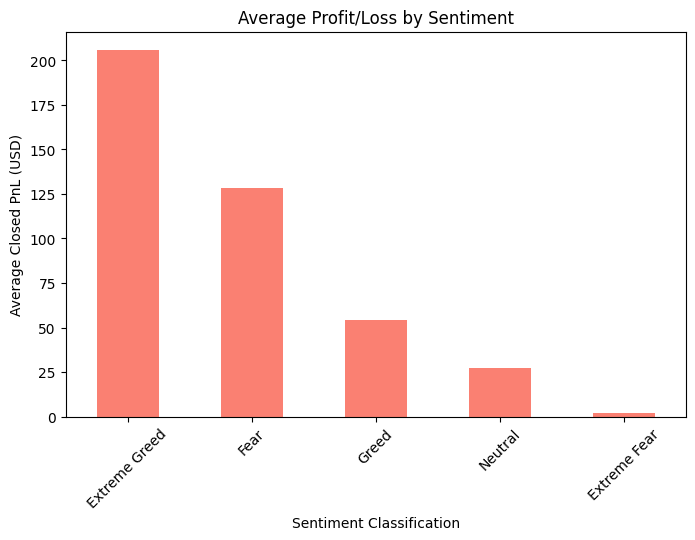

In [30]:
profit_sentiment = merged.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print("Average Closed PnL by Sentiment Classification:")
print(profit_sentiment)

profit_sentiment.plot(kind='bar', color='salmon', figsize=(8,5))
plt.title('Average Profit/Loss by Sentiment')
plt.ylabel('Average Closed PnL (USD)')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/AverageProfitorLossbySentiment.png', dpi=300, bbox_inches='tight')

plt.show()

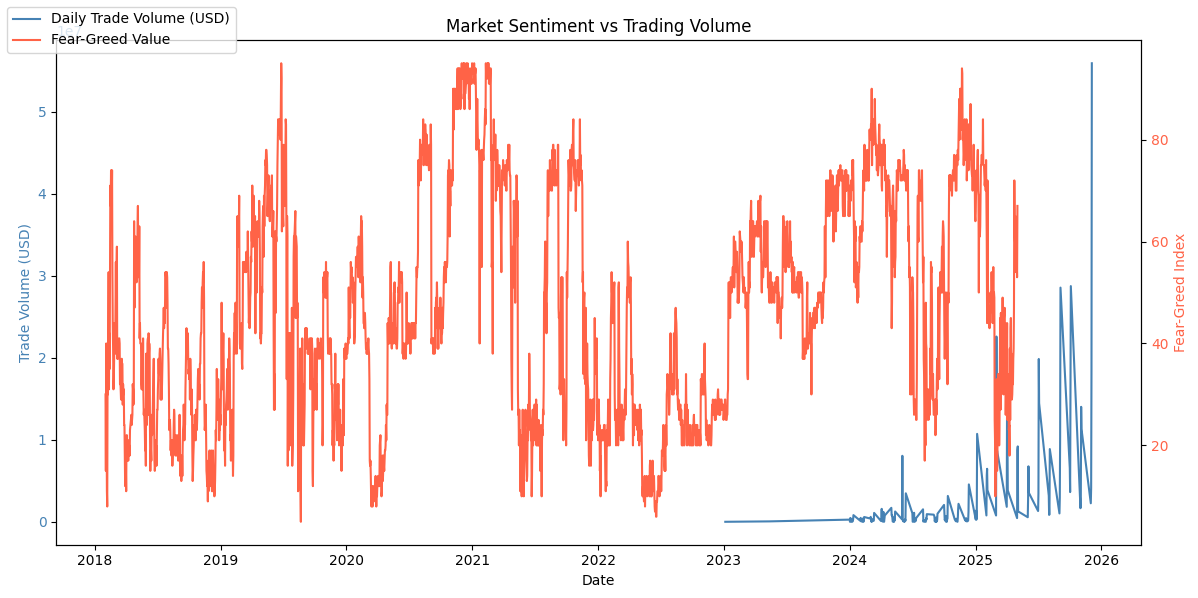

In [31]:
daily_volume = merged.groupby('date')['Size USD'].sum().reset_index()
daily_sentiment = fear_greed[['date','value']].dropna()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(daily_volume['date'], daily_volume['Size USD'], label='Daily Trade Volume (USD)', color='steelblue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Trade Volume (USD)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.plot(daily_sentiment['date'], daily_sentiment['value'], label='Fear-Greed Value', color='tomato')
ax2.set_ylabel('Fear-Greed Index', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title('Market Sentiment vs Trading Volume')
fig.tight_layout()
fig.legend(loc='upper left')
plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/MarketSentimentvsTradingVolume.png', dpi=300, bbox_inches='tight')

plt.show()

In [47]:
daily_profit = merged.groupby('date')['Closed PnL'].sum().reset_index()
corr_df = pd.merge(daily_profit, daily_sentiment, on='date', how='left').dropna()

corr = corr_df['Closed PnL'].corr(corr_df['value'])
with open('/content/drive/MyDrive/ds_amisha/outputs/correlation.txt', 'w') as f:
    f.write(f'Correlation between Sentiment Value and Daily Profit: {round(corr,3)}\n')
print('Correlation between Sentiment Value and Daily Profit:', round(corr,3))

Correlation between Sentiment Value and Daily Profit: -0.057


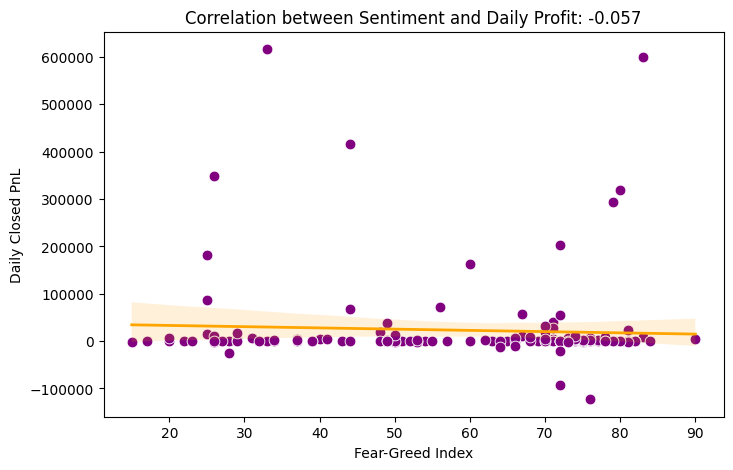

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=corr_df, x='value', y='Closed PnL', color='purple', s=60)
sns.regplot(data=corr_df, x='value', y='Closed PnL', scatter=False, color='orange', line_kws={'linewidth':2})
plt.title(f'Correlation between Sentiment and Daily Profit: {round(corr,3)}')
plt.xlabel('Fear-Greed Index')
plt.ylabel('Daily Closed PnL')
plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/CorrelationbetweenSentimentandDailyProfit.png', dpi=300, bbox_inches='tight')

plt.show()

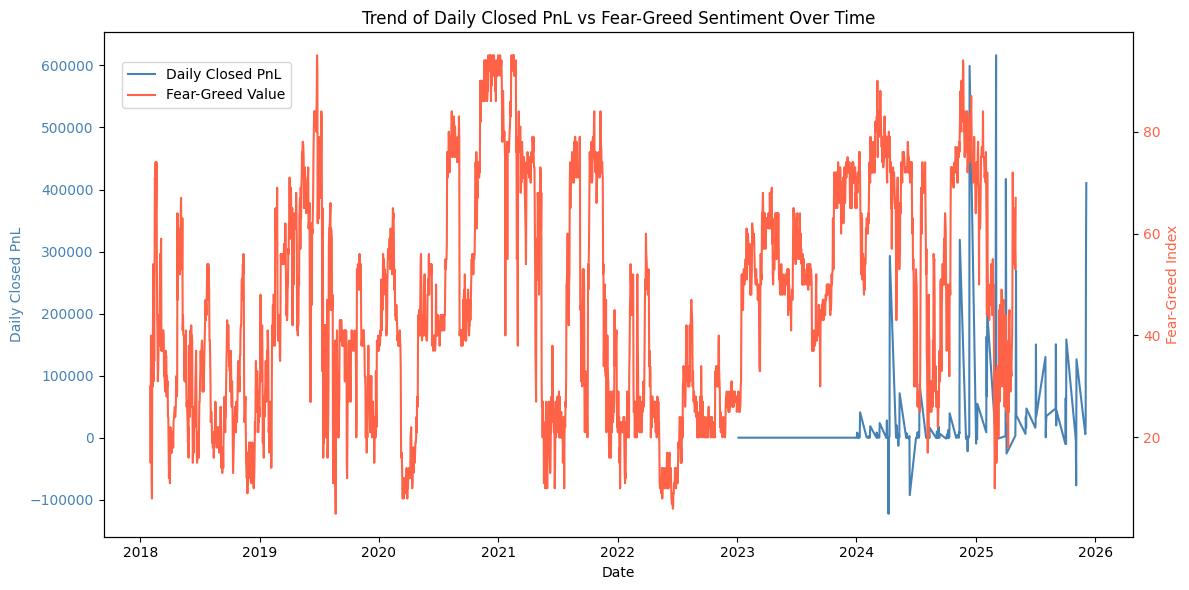

In [34]:
daily_pnl = merged.groupby('date')['Closed PnL'].sum().reset_index()
daily_sentiment = fear_greed[['date','value']].dropna()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(daily_pnl['date'], daily_pnl['Closed PnL'], color='steelblue', label='Daily Closed PnL')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Closed PnL', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.plot(daily_sentiment['date'], daily_sentiment['value'], color='tomato', label='Fear-Greed Value')
ax2.set_ylabel('Fear-Greed Index', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title('Trend of Daily Closed PnL vs Fear-Greed Sentiment Over Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/TrendofDailyClosedPnLvsFear-GreedSentimentOverTime.png', dpi=300, bbox_inches='tight')

plt.show()

In [43]:
account_sum = merged.groupby(['classification', 'Account'], as_index=False)['Closed PnL'].sum()
account_sum = account_sum.sort_values(['classification', 'Closed PnL'], ascending=[True, False])
top_accounts = account_sum.groupby('classification').head(5).reset_index(drop=True)
top_accounts.to_csv('/content/drive/MyDrive/ds_amisha/csv_files/top_accounts.csv', index=False)
top_accounts

,classification,Account,Closed PnL
0,Extreme Fear,0xbaaaf6571ab7d571043ff1e313a9609a10637864,3.869209e+03
1,Extreme Fear,0x4f93fead39b70a1824f981a54d4e55b278e9f760,3.084288e+03
2,Extreme Fear,0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,2.020000e+03
3,Extreme Fear,0x8477e447846c758f5a675856001ea72298fd9cb5,1.038311e+03
4,Extreme Fear,0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,9.377896e+02
5,Extreme Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,9.978715e+05
6,Extreme Greed,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,1.554902e+05
7,Extreme Greed,0x2c229d22b100a7beb69122eed721cee9b24011dd,2.389702e+04
8,Extreme Greed,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,2.092551e+04
9,Extreme Greed,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.764540e+04


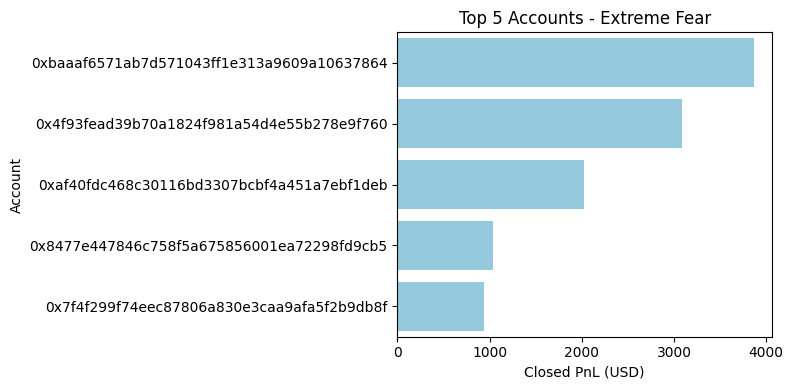

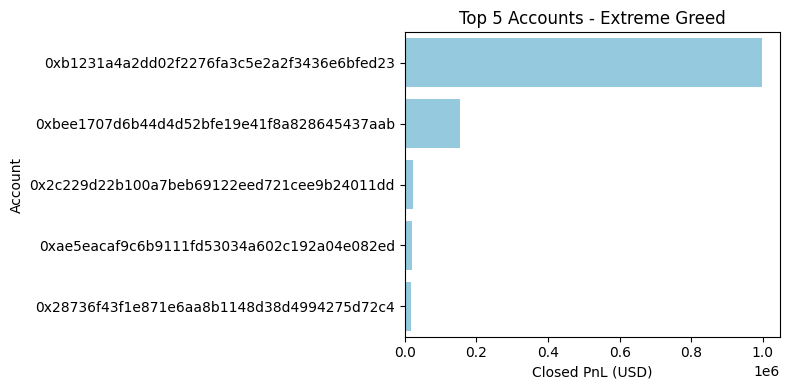

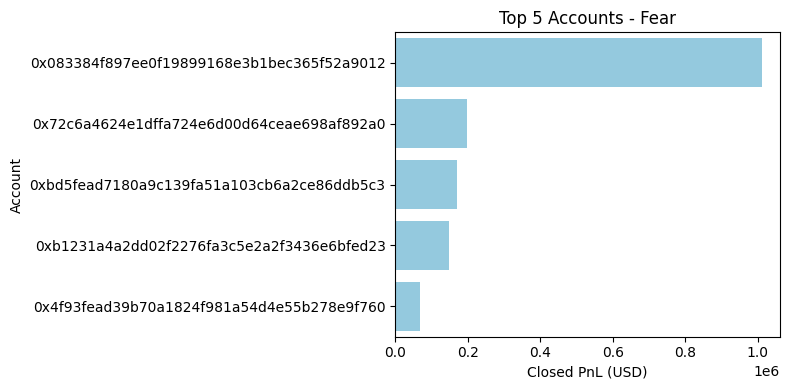

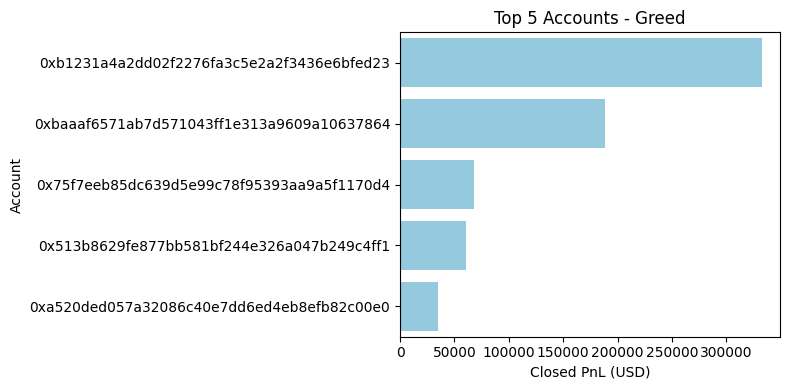

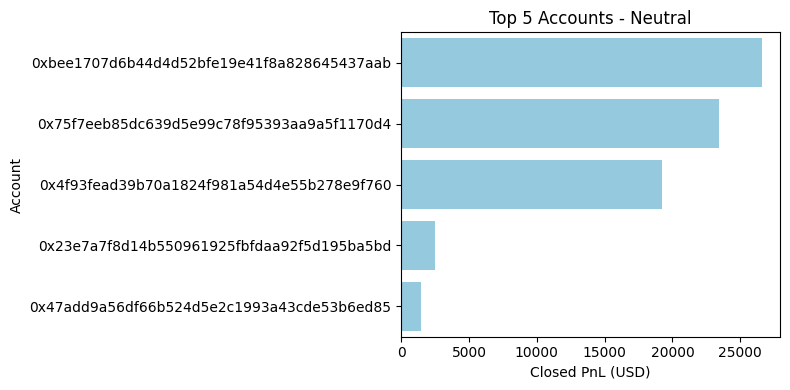

In [36]:
for sentiment in top_accounts['classification'].unique():
    plt.figure(figsize=(8,4))
    data = top_accounts[top_accounts['classification'] == sentiment]
    sns.barplot(x='Closed PnL', y='Account', data=data, color='skyblue')
    plt.title(f'Top 5 Accounts - {sentiment}')
    plt.xlabel('Closed PnL (USD)')
    plt.ylabel('Account')
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/Top5Accountspersentiment.png', dpi=300, bbox_inches='tight')
    plt.show()

In [44]:
top_days = (
    merged.groupby(['classification', 'date'])['Closed PnL']
    .sum()
    .reset_index()
)

top_days = top_days.sort_values('Closed PnL', ascending=False)\
                   .groupby('classification')\
                   .head(5)

print("Top 5 Days per Sentiment Classification:\n")
top_days.to_csv('/content/drive/MyDrive/ds_amisha/csv_files/top_days.csv', index=False)

top_days

Top 5 Days per Sentiment Classification:



,classification,date,Closed PnL
81,Fear,2025-03-03,616413.032233
48,Extreme Greed,2024-12-12,599151.795008
83,Fear,2025-04-02,416876.888120
80,Fear,2025-03-02,348871.326269
39,Extreme Greed,2024-11-12,319051.554217
28,Extreme Greed,2024-04-12,292891.815021
140,Greed,2025-02-04,202212.740938
84,Fear,2025-04-03,182075.566585
139,Greed,2025-02-02,162854.759623
58,Fear,2024-07-12,85906.279067


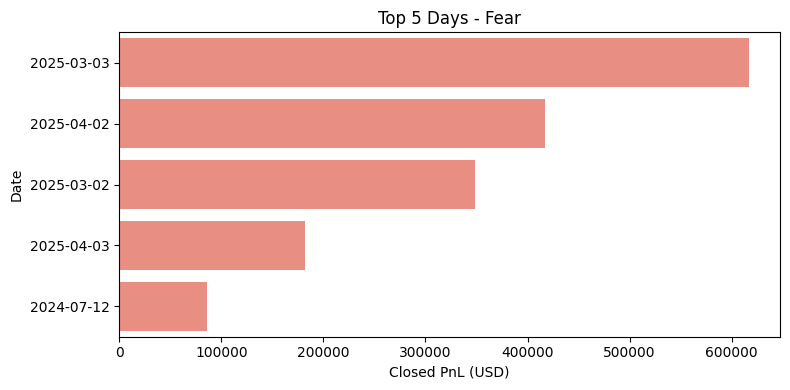

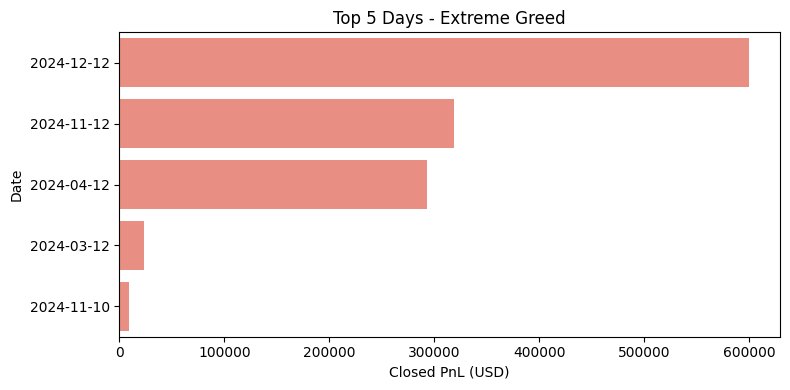

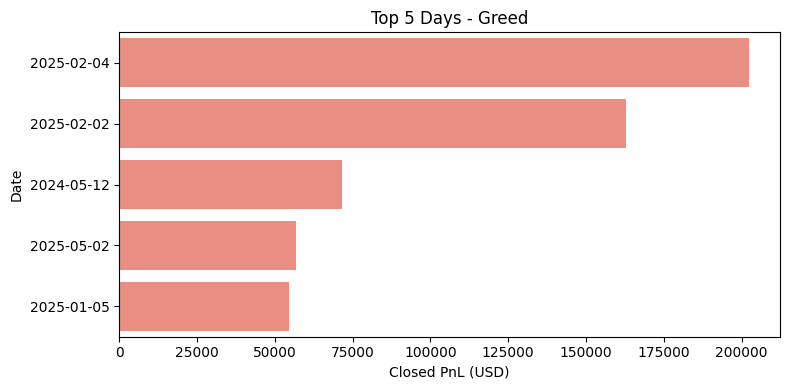

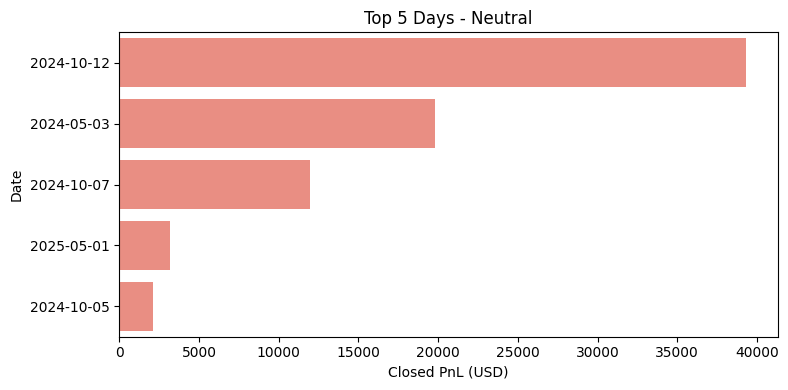

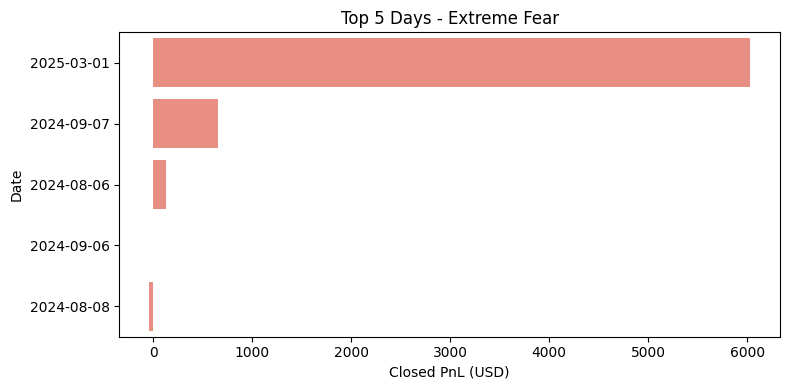

In [38]:
for sentiment in top_days['classification'].unique():
    plt.figure(figsize=(8,4))
    data = top_days[top_days['classification'] == sentiment]
    sns.barplot(x='Closed PnL', y='date', data=data, color='salmon')
    plt.title(f'Top 5 Days - {sentiment}')
    plt.xlabel('Closed PnL (USD)')
    plt.ylabel('Date')
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/Top5Dayspersentiment.png', dpi=300, bbox_inches='tight')
    plt.show()

In [45]:
avg_pnl_sentiment = merged.groupby('classification')['Closed PnL'].mean().reset_index()
avg_size_sentiment = merged.groupby('classification')['Size USD'].mean().reset_index()
trade_count_sentiment = merged.groupby('classification')['Size USD'].count().reset_index()

avg_pnl_sentiment.rename(columns={'Closed PnL':'Avg Closed PnL'}, inplace=True)
avg_size_sentiment.rename(columns={'Size USD':'Avg Trade Size USD'}, inplace=True)
trade_count_sentiment.rename(columns={'Size USD':'Trade Count'}, inplace=True)

summary_metrics = avg_pnl_sentiment.merge(avg_size_sentiment, on='classification')\
                                   .merge(trade_count_sentiment, on='classification')

summary_metrics.to_csv('/content/drive/MyDrive/ds_amisha/csv_files/summary_metrics.csv', index=False)

print("Summary Metrics by Sentiment:")
display(summary_metrics)

Summary Metrics by Sentiment:


,classification,Avg Closed PnL,Avg Trade Size USD,Trade Count
0,Extreme Fear,1.891632,4118.761840,2326
1,Extreme Greed,205.816345,3242.085086,5621
2,Fear,128.287950,5744.782685,13869
3,Greed,53.988003,5051.878829,11292
4,Neutral,27.088803,4332.202906,2756


/tmp/ipython-input-2600337527.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2600337527.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2600337527.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


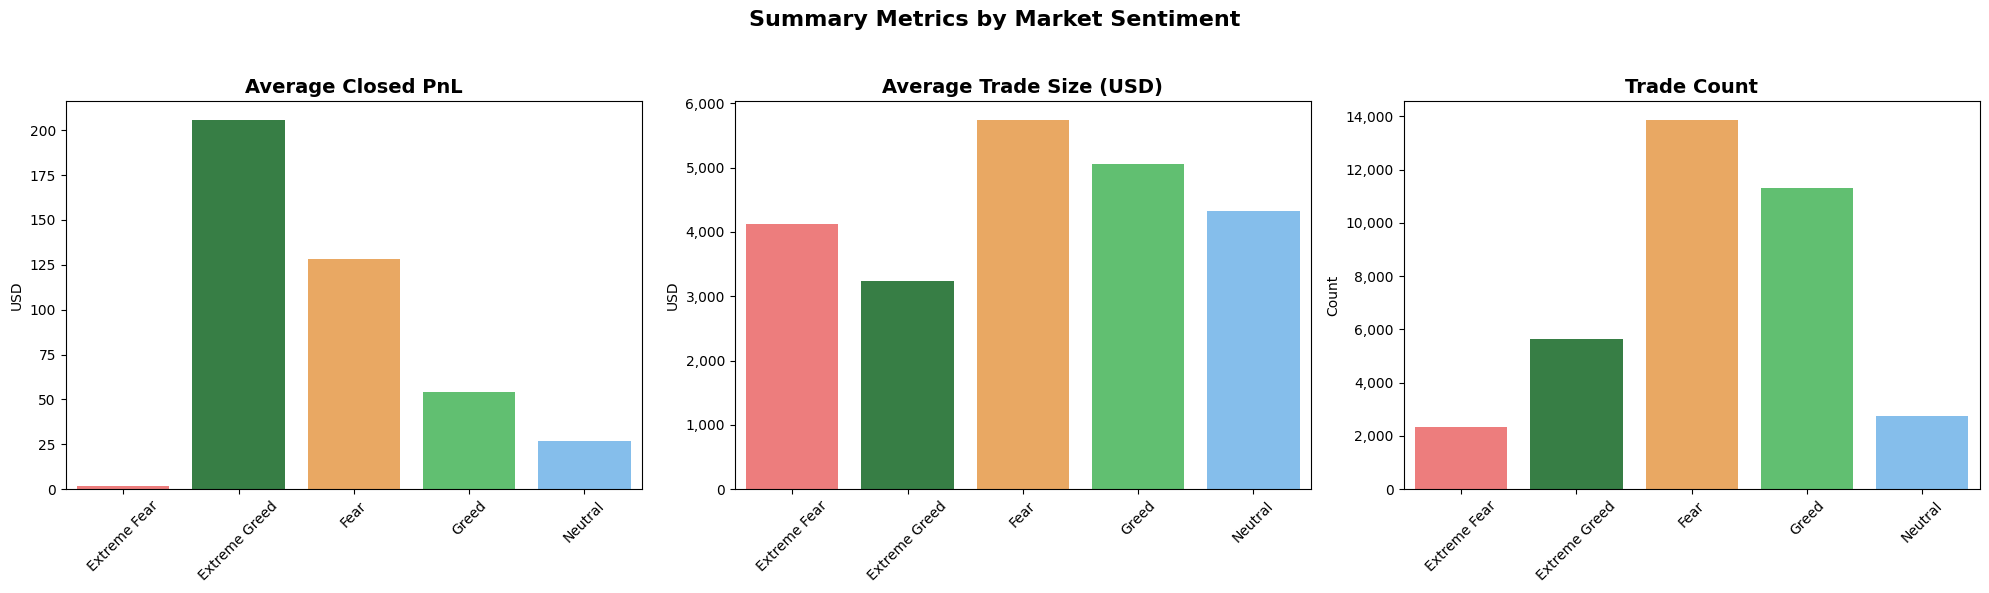

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

palette = {
    'Extreme Fear':'#FF6B6B',
    'Fear':'#FFA94D',
    'Neutral':'#74C0FC',
    'Greed':'#51CF66',
    'Extreme Greed':'#2B8A3E'
}

sns.barplot(
    data=summary_metrics, x='classification', y='Avg Closed PnL', palette=palette, ax=axes[0]
)
axes[0].set_title('Average Closed PnL', fontsize=14, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('USD')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter(lambda x, _: f'{x:,.0f}')

sns.barplot(
    data=summary_metrics, x='classification', y='Avg Trade Size USD', palette=palette, ax=axes[1]
)
axes[1].set_title('Average Trade Size (USD)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('USD')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(lambda x, _: f'{x:,.0f}')

sns.barplot(
    data=summary_metrics, x='classification', y='Trade Count', palette=palette, ax=axes[2]
)
axes[2].set_title('Trade Count', fontsize=14, fontweight='bold')
axes[2].set_xlabel('')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
axes[2].yaxis.set_major_formatter(lambda x, _: f'{int(x):,}')

plt.suptitle('Summary Metrics by Market Sentiment', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('/content/drive/MyDrive/ds_amisha/outputs/SummaryMetricsbyMarketSentiment.png', dpi=300, bbox_inches='tight')
plt.show()